In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from numpy import linalg as LA
import pandas as pd
from scipy import integrate
from scipy.linalg import logm, expm
from time import time
from Complexity_Functions import *
# import seaborn as sns

### Complexity Slope As a Function of Coin Angle 

In [11]:
niel_com_1local = np.loadtxt('niel_com_1local.txt')
niel_com_2local = np.loadtxt('niel_com_2local.txt')
niel_com_3local = np.loadtxt('niel_com_3local.txt')
θ = np.loadtxt('angle.txt')

In [12]:
Time_Span = 100
xx = np.linspace(0,Time_Span,Time_Span)
slope1 = np.zeros_like(θ)
intercept1 = np.zeros_like(slope1)

slope2 = np.zeros_like(θ)
intercept2 = np.zeros_like(slope1)

slope3 = np.zeros_like(θ)
intercept3 = np.zeros_like(slope1)



for i in range(len(θ)):
    slope1[i],intercept1[i] = np.polyfit(xx,np.cumsum(niel_com_1local[:,i]),1)
    slope2[i],intercept2[i] = np.polyfit(xx,np.cumsum(niel_com_2local[:,i]),1)
    slope3[i],intercept3[i] = np.polyfit(xx,np.cumsum(niel_com_3local[:,i]),1)


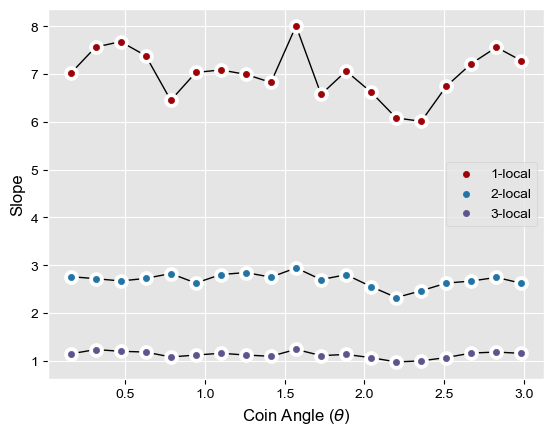

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('ggplot')
# Global options.
plt.rcParams['font.family'] = 'arial'

# Data from p74 of Visual Display of Quantitative Information.
x = θ
y1 = slope1
y2 = slope2
y3 = slope3


# Plot line, line masks, then dots.
fig, ax = plt.subplots()
ax.plot(x, y1, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y1, color='white', s=100, zorder=2)
ax.scatter(x, y1, color='#9D0208', s=20, zorder=3,label = '1-local')

ax.plot(x, y2, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y2, color='white', s=100, zorder=2)
ax.scatter(x, y2, color='#2274A5', s=20, zorder=3,label='2-local')

ax.plot(x, y3, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y3, color='white', s=100, zorder=2)
ax.scatter(x, y3, color='#5E548E', s=20, zorder=3,label='3-local')


plt.xlabel(r'Coin Angle ($\theta$)',fontsize  = 12)
plt.ylabel(r'Slope',fontsize = 12)
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.legend()
# plt.savefig('slope_VS_angle.pdf',dpi = 500,bbox_inches='tight')
plt.show()



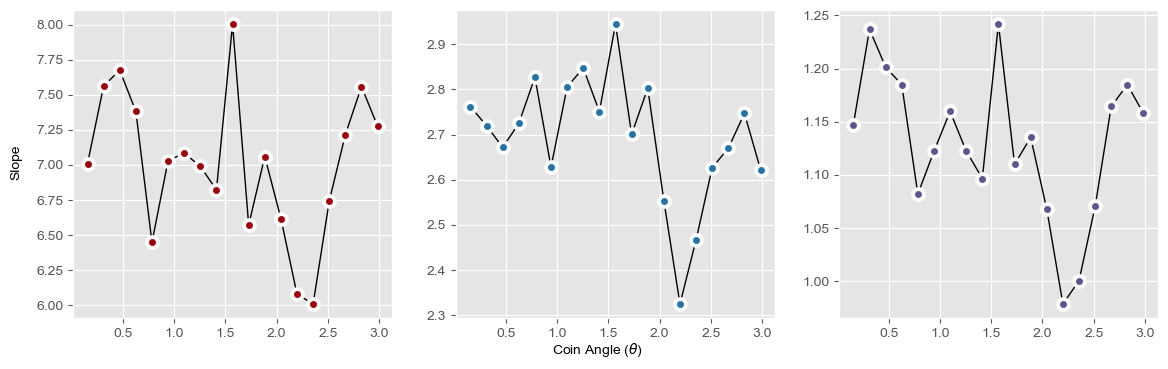

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].plot(x, y1, linestyle='-', color='black', linewidth=1, zorder=1)
ax[0].scatter(x, y1, color='white', s=100, zorder=2)
ax[0].scatter(x, y1, color='#9D0208', s=20, zorder=3,label = '1-local')

ax[1].plot(x, y2, linestyle='-', color='black', linewidth=1, zorder=1)
ax[1].scatter(x, y2, color='white', s=100, zorder=2)
ax[1].scatter(x, y2, color='#2274A5', s=20, zorder=3,label='2-local')

ax[2].plot(x, y3, linestyle='-', color='black', linewidth=1, zorder=1)
ax[2].scatter(x, y3, color='white', s=100, zorder=2)
ax[2].scatter(x, y3, color='#5E548E', s=20, zorder=3,label='3-local')

fig.text(0.5, 0.02, r'Coin Angle ($\theta$)', ha='center')
fig.text(0.08, 0.5, r'Slope', va='center', rotation='vertical')
plt.savefig('slope_VS_angle_separate.pdf',dpi = 500,bbox_inches='tight')
plt.show()

### Quantum Circuit Depth with Varying Steps

In [2]:
Time_Steps = 100

U12_MIN = []
Ψ_CP = DQW(np.pi/4)
for i in range(Time_Steps):
    U12 = SAMPLE_GEN(Ψ_CP[i],Ψ_CP[i+1],500)
    niel_com,argmin = MIN_COMPLEXITY(U12)
    U12_MIN.append(U12[argmin])
    
    
    

C:\Users\qoqi-himanshu\Dropbox\QUANTUM WALK\Q-algorithms\q-complexity\Code_File\Finalized\Complexity_Functions.py:230: ComplexWarning: Casting complex values to real discards the imaginary part
  niel_com[i] = COMPLEXITY(U12[i],locality)


In [7]:
from qiskit import QuantumCircuit, transpile
Circuit_Depth = []
for i in range(Time_Steps):
    qc = QuantumCircuit(2)
    qc.unitary(U12_MIN[i],([0,1]))
    trans_qc = transpile(qc,basis_gates = ['cx','u3'],optimization_level = 3)
    # print('\n')
    # print(trans_qc)
    # print('\n')
    Circuit_Depth.append(trans_qc.depth())
    

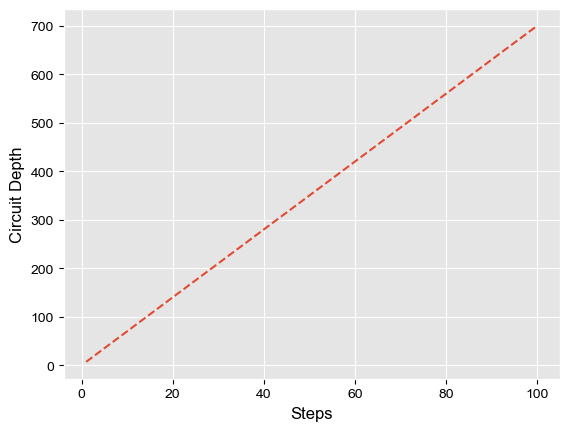

In [10]:
xx = np.linspace(1,Time_Steps,Time_Steps)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('ggplot')
# Global options.
plt.rcParams['font.family'] = 'arial'

# Data from p74 of Visual Display of Quantitative Information.
x = xx
y = np.cumsum(Circuit_Depth)
# Plot line, line masks, then dots.
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='--') #, color='red', linewidth=1, zorder=1)
# ax.scatter(x, y, color='white', s=100, zorder=2)
# ax.scatter(x, y, color='black', s=5, zorder=3)
plt.ylabel('Circuit Depth',fontsize = 12)
plt.xlabel(r'Steps',fontsize = 12)
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.savefig('CircuitDepth_Steps.pdf',dpi = 500,bbox_inches='tight')
plt.show()
